### Criação de Gráficos em Python

##### 2) Um professor está analisando o desempenho dos alunos em uma disciplina ao longo do semestre. Ele deseja visualizar a distribuição das notas e a nota dos alunos que se destacaram, tanto positivamente, quanto negativamente. Qual tipo de visualização você recomendaria para representar essas informações de forma clara e informativa? Explique sua escolha.

#### Geração dos Dados

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)
alunos = ['João', 'Maria', 'Pedro', 'Ana', 'Bruno', 'Henrique', 'Carla', 'Mariana', 'Paulo', 'Lucas']
n_provas = 3  # Número de provas
notas = np.random.normal(70, 10, len(alunos) * n_provas)

dados = pd.DataFrame({'Aluno': alunos * n_provas, 'Prova': np.repeat(range(1, n_provas + 1), len(alunos)), 'Nota': notas.flatten()})

# média das notas de cada aluno
media_aluno = dados.groupby('Aluno')['Nota'].mean().reset_index()
media = media_aluno['Nota'].mean()
std_dev = media_aluno['Nota'].std()

# Limites performaticos
destaque_bom = media + std_dev
destaque_ruim = media - std_dev

# pivotando a tabela para o heatmap
heatmap_data = dados.pivot_table(index='Aluno', columns='Prova', values='Nota')
heatmap_data['Média'] = heatmap_data.mean(axis=1) # Afim de auxiliar no heatmap, adicionando um bloco de média


#### Gráficos Impactantes

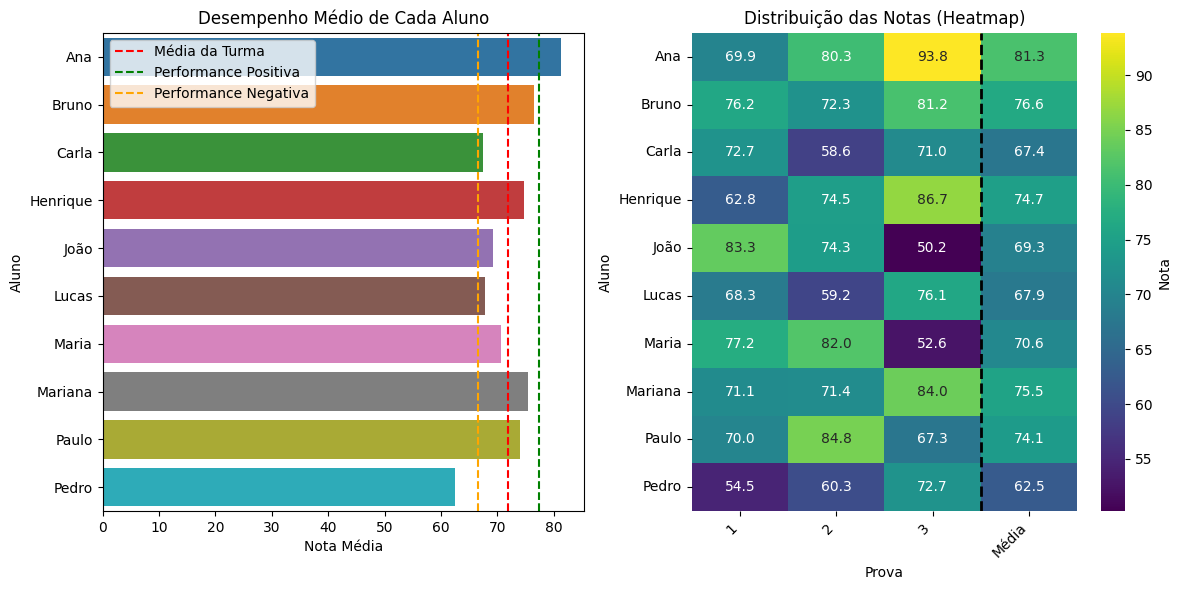

In [78]:
plt.figure(figsize=(12, 6))

# Gráfico de Barras
plt.subplot(1, 2, 1)
sns.barplot(x='Nota', y='Aluno', data=media_aluno, hue='Aluno', legend=False)
plt.axvline(x=media_aluno['Nota'].mean(), color='red', linestyle='--', label='Média da Turma')
plt.axvline(x=destaque_bom, color='green', linestyle='--', label='Performance Positiva')
plt.axvline(x=destaque_ruim, color='orange', linestyle='--', label='Performance Negativa')
plt.xlabel('Nota Média')
plt.ylabel('Aluno')
plt.title('Desempenho Médio de Cada Aluno')
plt.legend()

# Heatmap
# Heatmap nota/prova e a média total das provas
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", cbar_kws={'label': 'Nota'})
plt.xlabel('Prova')
plt.ylabel('Aluno')
plt.title('Distribuição das Notas (Heatmap)')

# Posicionando a linha da média dos alunos
plt.axvline(x=n_provas, color='black', linestyle='--', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)


plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


### Escolha:

##### Gráfico de barras e um Mapa de calor para melhor contextualização
Gráfico de Barras: Representando a média das notas de cada aluno ao longo do semestre. Útil para comparar as notas dos alunos entre si e com a média da turma, além de identificar rapidamente os alunos que se destacam positivamente ou negativamente.  <br> <br>
Mapa de Calor (Heatmap): utilizado para visualizar a distribuição das notas dos alunos em cada prova ao longo do semestre. Cada celula representando a nota do aluno, e as cores diferentes indicando os niveis de desempenho. Facilitando a identificação de padrões e tendências nas notas dos alunos ao longo do tempo. <br> <br> E por fim um bloco adicionado da Média das notas do respectivo aluno ao longo do semestre.  <br> <br>